# Recurrent neural networks

# Task 1

Get IBM stock market data and evaluate prediction on a set of recurrent neural networks.

Dataset can be downloaded from https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231



## Subtask 1

Load data and prepare the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])
data

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
...,...,...,...,...,...,...
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


In [ ]:
low_col = np.array(data['Low'])
low_col

array([ 80.81,  81.33,  81.  , ..., 152.61, 153.2 , 153.42])

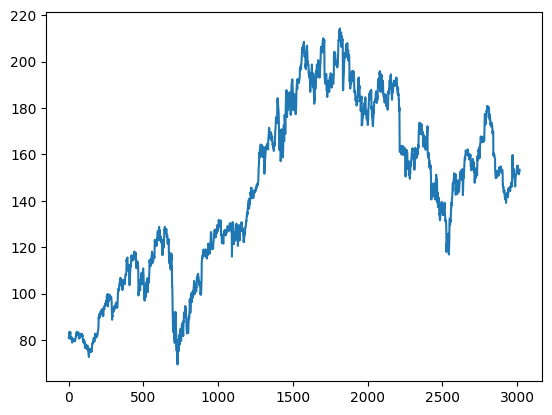

In [ ]:
plt.plot(low_col)

# Subtask 2

Perform prediction by using feed-forward neural network (sliding window)

In [ ]:
close = (data['Close'])
close


,Close
Date,
2006-01-03,82.06
2006-01-04,81.95
2006-01-05,82.50
2006-01-06,84.95
2006-01-09,83.73
...,...
2017-12-22,152.50
2017-12-26,152.83
2017-12-27,153.13


In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler


In [ ]:
training_set = close[:'2016']
test_set = close['2017':]


In [ ]:

scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(training_set.values.reshape(-1, 1))


In [ ]:
print(scaled_data.shape)
print(test_set.shape)

(2769, 1)
(250,)


In [ ]:
window_size = 3

X_train, y_train = [], []
for i in range(window_size, len(scaled_data)):
        X_train.append(scaled_data[i - window_size:i])
        y_train.append(scaled_data[i, 0])

x_train,y_train = np.array(X_train),np.array(y_train)

x_train = x_train.reshape(-1, window_size, 1)
print(x_train.shape,y_train.shape)


(2766, 3, 1) (2766,)


In [ ]:
actual_values = test_set.values
total_dataset = pd.concat((training_set, test_set), axis=0)
len_train_data = len(total_dataset)-len(test_set)

x_test,y_test = [],[]

y_test = total_dataset[len_train_data-window_size:].values
y_test = y_test.reshape(-1,1)

y_test = scaler.transform(y_test)
# y_test.shape


for i in range(window_size, len(y_test)):
  x_test.append(y_test[i-window_size:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape,y_test.shape)

(250, 3, 1) (253, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Flatten

model =Sequential()
input_shape = (x_train.shape[1],1)
model.add(Flatten(input_shape=input_shape))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.metrics import RootMeanSquaredError

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

In [ ]:
FFN_Hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1408 - mse: 0.1408
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - mse: 0.0077
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 - mse: 0.0055
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - mse: 0.0041
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - mse: 0.0029


In [ ]:
from sklearn.metrics import mean_squared_error

FFNpredictions = model.predict(x_test)
FFNpredictions = scaler.inverse_transform(FFNpredictions)
FFNmse =mean_squared_error(test_set,FFNpredictions.flatten())
print("FFN-mse :",FFNmse)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
FFN-mse : 19.969604180695658


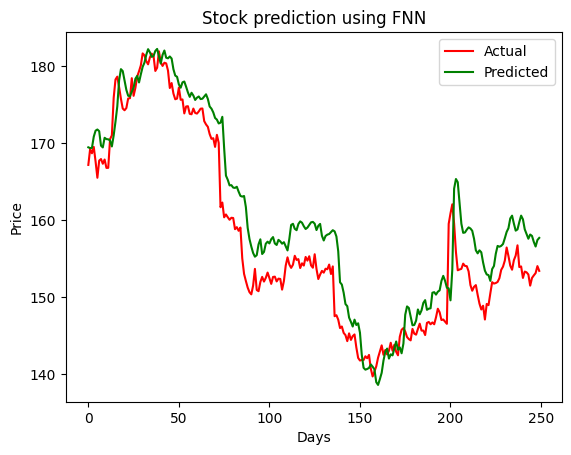

In [ ]:
plt.plot(actual_values, color='red', label=f"Actual")
plt.plot(FFNpredictions, color= 'green', label="Predicted")
plt.title("Stock prediction using FNN")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

## Subtask 3

Perform prediction by using RNN

In [ ]:

from keras.layers import SimpleRNN

RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(units=32, input_shape=(x_train.shape[1],1), activation='tanh'))
RNNmodel.add(Dense(units=8, activation='tanh'))
RNNmodel.add(Dense(units=1, activation='linear'))
RNNmodel.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,361 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
RNNmodel.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
RNNhist = RNNmodel.fit(x_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1691e-04 - mse: 8.1691e-04
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0539e-04 - mse: 8.0539e-04
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8269e-04 - mse: 7.8269e-04
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4940e-04 - mse: 8.4940e-04
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6996e-04 - mse: 8.6996e-04
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0895e-04 - mse: 8.0895e-04
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4751e-04 - mse: 7.4751e-04
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5795e-04 - mse: 6.5795e-04
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8848e-04 - mse: 7.8848e-04
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4997e-04 - mse: 7.4997e-04
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:


RNNpredictions = RNNmodel.predict(x_test)
RNNpredictions = scaler.inverse_transform(RNNpredictions)
RNNmse = mean_squared_error(test_set,RNNpredictions.flatten())
print("RNN-mse :",RNNmse)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
RNN-mse : 2.600226731696928


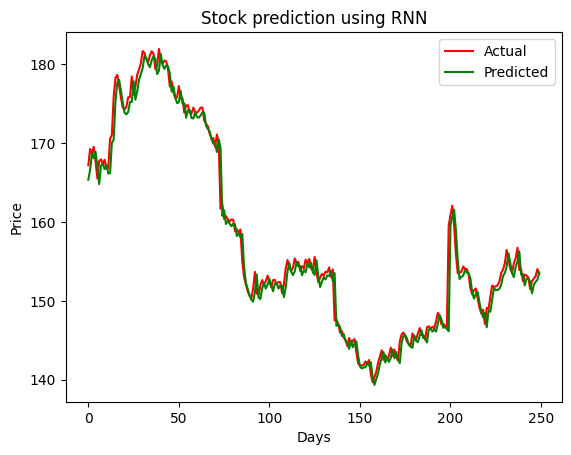

In [ ]:
plt.plot(actual_values, color='red', label=f"Actual")
plt.plot(RNNpredictions, color= 'green', label="Predicted")
plt.title("Stock prediction using RNN")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

## Subtask 4

Perform prediction by using LSTM

In [ ]:
# Write your code here

from keras.layers import LSTM,InputLayer

LSTMmodel = Sequential()
LSTMmodel.add(InputLayer(input_shape=(x_train.shape[1], 1)))
LSTMmodel.add(LSTM(100, return_sequences=False))
LSTMmodel.add(Dense(50))
LSTMmodel.add(Dense(1))
LSTMmodel.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,901 (179.30 KB)

 Trainable params: 45,901 (179.30 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
LSTMmodel.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse'])
LSTMhist = LSTMmodel.fit(x_train, y_train, batch_size= 64, epochs=20)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1190 - mse: 0.1190
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - mse: 0.0017
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - mse: 0.0011
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - mse: 0.0012
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - mse: 0.0012
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mse: 0.0011
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mse: 0.0011
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mse: 0.0011
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mse: 0.0011
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mse: 0.0012
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mse: 0.0011
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mse: 0.0011
Epoch 13/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

In [ ]:
LSTMpredictions = LSTMmodel.predict(x_test)
LSTMpredictions = scaler.inverse_transform(LSTMpredictions)
LSTMmse = mean_squared_error(test_set,LSTMpredictions.flatten())
print("LSTM-mse :",LSTMmse)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
LSTM-mse : 3.788897122679704


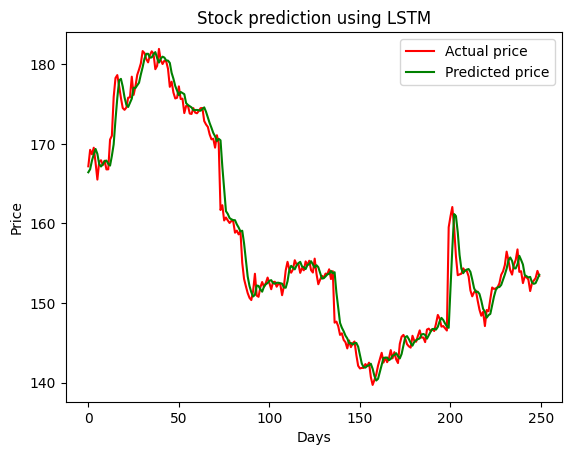

In [ ]:
plt.plot(actual_values, color='red', label=f"Actual price")
plt.plot(LSTMpredictions, color= 'green', label="Predicted price")
plt.title("Stock prediction using LSTM")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

## Subtask 5

Compare all above results by using MSE error and dermine the best architecture. You can do tests on more stock data than IBM.

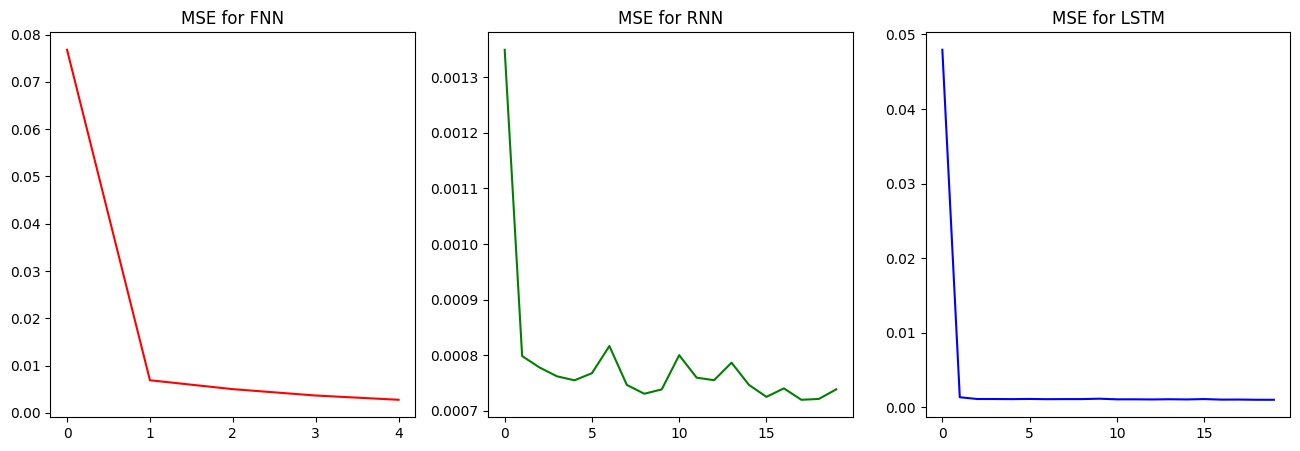

In [ ]:
# comparing results using MSE error
fig, ax = plt.subplots(ncols=3, figsize=(16, 5))
ax[0].plot(FFN_Hist.history['mse'], color="red")
ax[0].set_title("MSE for FNN")
ax[1].plot(RNNhist.history['mse'],color="green")
ax[1].set_title("MSE for RNN")
ax[2].plot(LSTMhist.history['mse'],color="blue")
ax[2].set_title("MSE for LSTM")

plt.show()

In [ ]:
print("FFN-MSE:",FFNmse)
print("RNN-MSE:",RNNmse)
print("LSTM-mse:",LSTMmse)

FFN-MSE: 19.969604180695658
RNN-MSE: 2.600226731696928
LSTM-mse: 3.788897122679704
